目标极值点 (x_1, x_2) = (3, 0.5)

No Optimizer求得极值点 (x_1, x_2) = (0.0, 0.0)


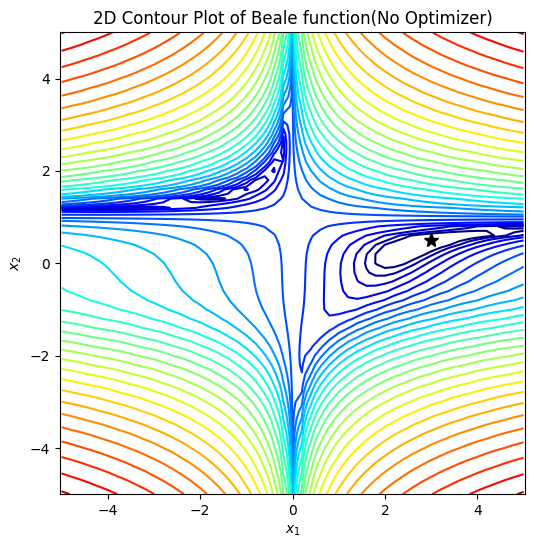

SGD求得极值点 (x_1, x_2) = (2.9987127427754707, 0.4996785218187676)


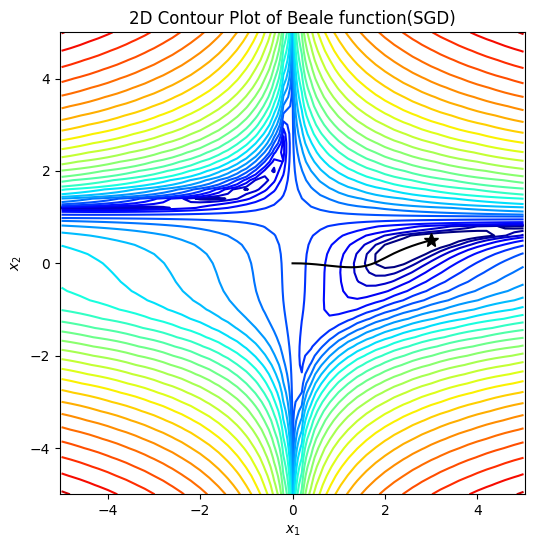

Momentum求得极值点 (x_1, x_2) = (3.0000000000000053, 0.5000000000000013)


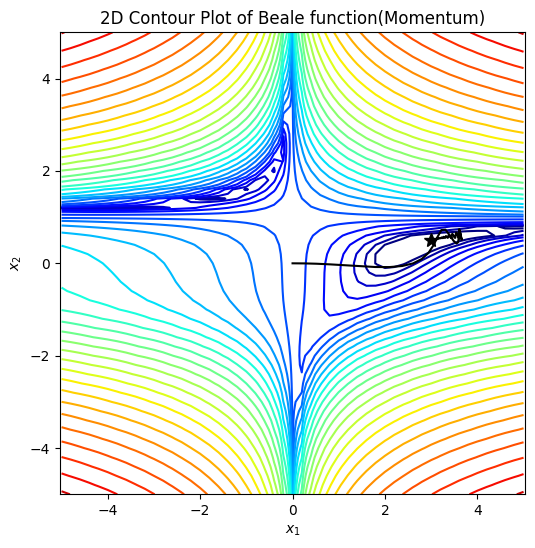

Adam求得极值点 (x_1, x_2) = (2.962175638124232, 0.4904693012355363)


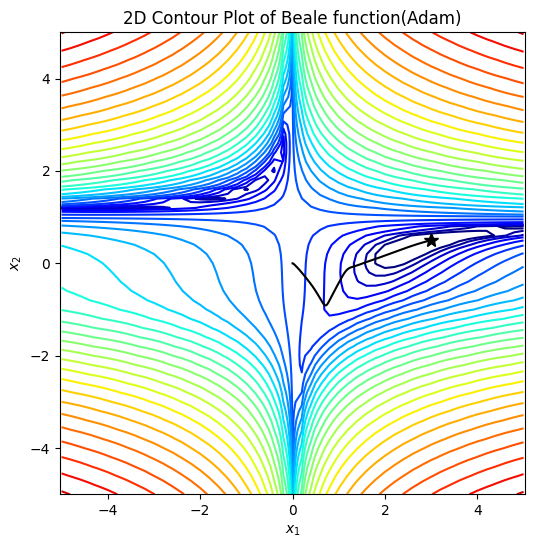

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl
from easydict import EasyDict as edict


# 定义目标函数beale、目标函数的偏导函数dbeale_dx，并画出目标函数
# 定义函数beale
def beale(x1, x2):
    return (1.5 - x1 + x1 * x2) ** 2 + (2.25 - x1 + x1 * x2 ** 2) ** 2 + (2.625 - x1 + x1 * x2 ** 3) ** 2

# 定义函数beale的偏导
def dbeale_dx(x1, x2):
    dfdx1 = 2 * (1.5 - x1 + x1 * x2) * (x2 - 1) + 2 * (2.25 - x1 + x1 * x2 ** 2) * (x2 ** 2 - 1) + 2 * (
            2.625 - x1 + x1 * x2 ** 3) * (x2 ** 3 - 1)
    dfdx2 = 2 * (1.5 - x1 + x1 * x2) * x1 + 2 * (2.25 - x1 + x1 * x2 ** 2) * (2 * x1 * x2) + 2 * (
            2.625 - x1 + x1 * x2 ** 3) * (3 * x1 * x2 ** 2)
    return dfdx1, dfdx2
step_x1, step_x2 = 0.2, 0.2
X1, X2 = np.meshgrid(np.arange(-5, 5 + step_x1, step_x1),
                     np.arange(-5, 5 + step_x2, step_x2))
Y = beale(X1, X2)

# 定义画图函数
def gd_plot(x_traj, name):
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.contour(X1, X2, Y, levels=np.logspace(0, 6, 30),
                norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
    plt.title(f'2D Contour Plot of Beale function({name})')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')
    plt.plot(3, 0.5, 'k*', markersize=10)
    if x_traj is not None:
        x_traj = np.array(x_traj)
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')
    plt.show()


# 定义各优化器的参数
cfg = edict({
    'initial': np.array([0.0, 0.0]), # 优化器的初始值
    'iterations': 2500, # 优化器的迭代次数
    'learning_rate': 0.0075, # 学习率
    'momentum': 0.9, # Momentum优化器中的动量参数，可以加速优化器在正确方向的移动
    'beta1': 0.9, # Adam优化器中的一阶矩估计的指数衰减率
    'beta2': 0.999, # Adam优化器中的二阶矩估计的指数衰减率
    'epsilon': 1e-8, # Adam优化器中用于避免零除的小常数
})


# 实现各优化器
# 定义none优化器，不进行任何优化，返回初始值
def none(x0):
    x_traj = [x0]
    for _ in range(1, cfg.iterations + 1):
        x_traj.append(x_traj[-1])
    return x_traj

# 定义SGD优化器，每次迭代，使用目标函数的负梯度进行更新
def SGD(x0):
    x_traj = [x0]
    for _ in range(1, cfg.iterations + 1):
        dfdx = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1]))
        v = - cfg.learning_rate * dfdx
        x_traj.append(x_traj[-1] + v)
    return x_traj

# 定义Momentum优化器，每次迭代，考虑了之前的动量，对更新进行加速
def Momentum(x0):
    x_traj = [x0]
    v = np.zeros_like(x0)
    for _ in range(1, cfg.iterations + 1):
        dfdx = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1]))
        v = cfg.momentum * v - cfg.learning_rate * dfdx
        x_traj.append(x_traj[-1] + v)
    return x_traj

# 定义Adam优化器，每次迭代，结合了一阶矩估计和二阶矩估计的信息进行更新
def Adam(x0):
    x_traj = [x0]
    m = np.zeros_like(x0)
    v = np.zeros_like(x0)
    for i in range(1, cfg.iterations + 1):
        dfdx = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1]))
        m = cfg.beta1 * m + (1 - cfg.beta1) * dfdx
        v = cfg.beta2 * v + (1 - cfg.beta2) * (dfdx ** 2)
        m_hat = m / (1 - cfg.beta1 ** i)
        v_hat = v / (1 - cfg.beta2 ** i)
        x_traj.append(x_traj[-1] - cfg.learning_rate * m_hat / (np.sqrt(v_hat) + cfg.epsilon))
    return x_traj


# 使用各优化器求解并绘制轨迹
print("目标极值点 (x_1, x_2) = (3, 0.5)\n")
# 对于每个优化器，都先求解出优化后的极值点，然后进行绘图
for name, optimizer in [('No Optimizer', none), ('SGD', SGD), ('Momentum', Momentum), ('Adam', Adam)]:
    x_traj = optimizer(cfg.initial)
    print(f"{name}求得极值点 (x_1, x_2) = ({x_traj[-1][0]}, {x_traj[-1][1]})")
    gd_plot(x_traj, name)
